In [15]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.metrics import fbeta_score , accuracy_score , recall_score , precision_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
%matplotlib inline 

from time import time
from sklearn import svm
from sklearn.ensemble import   AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.utils import shuffle


In [2]:
df = pd.read_csv('data_shop2.csv' , sep = ';' , index_col = 0)

In [3]:
def filter_col(x):
    try:
        return float(x)
    except:
        return np.nan
df['click_through_rate'] = df['click_through_rate'].map(filter_col)
df[~df['click_through_rate'].isnull()]

,id,class_type,car_type,price,address_zip,first_joined,creation_date,deletion_date,search_number,view_number,days_online,click_through_rate
0,348702726.0,bronze,Volvo,2790.0,3,2014.0,12.07.18,22.08.18,217.3,13.50,NaN,0.041417
1,363615514.0,bronze,Peugeot,1330.0,4,2014.0,16.11.18,29.12.18,473.7,31.05,NaN,0.043699
2,363908812.0,bronze,Renault,1770.0,7,2010.0,20.11.18,30.11.18,25.5,2.55,NaN,0.063333
3,363595390.0,bronze,Audi,2880.0,5,2013.0,16.11.18,29.01.19,81.3,4.35,NaN,0.035670
4,364646620.0,bronze,Ford,2150.0,1,2009.0,28.11.18,29.12.18,122.4,16.50,NaN,0.089869
...,...,...,...,...,...,...,...,...,...,...,...,...
78317,357547191.0,bronze,Mercedes-Benz,11770.0,7,2017.0,08.09.18,12.09.18,32.8,3.90,NaN,0.075305
78318,361866378.0,bronze,Hyundai,350.0,7,2004.0,28.10.18,21.12.18,160.5,5.85,NaN,0.024299
78319,360811860.0,bronze,Skoda,2976.0,3,2016.0,16.10.18,27.10.18,55.0,10.95,NaN,0.126091
78320,351143737.0,bronze,Renault,650.0,4,2009.0,28.07.18,01.10.18,241.8,6.75,NaN,0.017680


In [4]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%d.%m.%y')

df['deletion_date'] =  pd.to_datetime(df['deletion_date'], format='%d.%m.%y')


In [5]:
# calculate the days that an article has been online , is there a warning why ?
df['days_online'] = (df['deletion_date']- df['creation_date']).dt.days

In [6]:
df.dropna(inplace = True)


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'address_zip'}>],
       [<AxesSubplot:title={'center':'first_joined'}>,
        <AxesSubplot:title={'center':'search_number'}>,
        <AxesSubplot:title={'center':'view_number'}>],
       [<AxesSubplot:title={'center':'days_online'}>,
        <AxesSubplot:title={'center':'click_through_rate'}>,
        <AxesSubplot:>]], dtype=object)

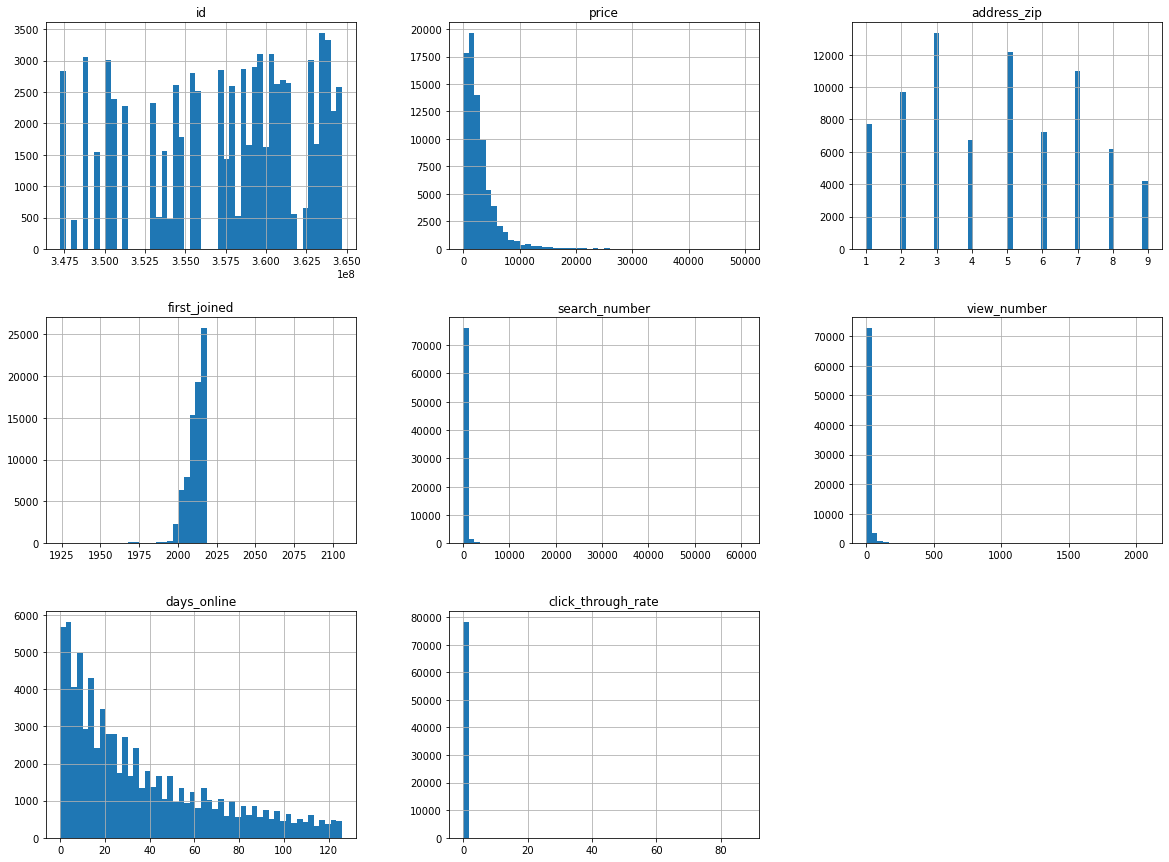

In [10]:
import matplotlib as plt 

df.hist(bins=50, figsize=(20,15)) 

In [12]:
skewed = ['price','search_number','view_number','click_through_rate']

features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))




In [13]:
# does the data needs scaling ?



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical = ['price', 'address_zip', 'first_joined', 'search_number', 'view_number'
             ,'days_online','click_through_rate']


features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/nasim/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/nasim/anaconda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,id,class_type,car_type,price,address_zip,first_joined,creation_date,deletion_date,search_number,view_number,days_online,click_through_rate
0,348702726.0,bronze,Volvo,0.357558,-0.693265,0.445267,2018-07-12,2018-08-22,0.649872,0.631598,0.155608,-0.116857
1,363615514.0,bronze,Peugeot,-0.390025,-0.268537,0.445267,2018-11-16,2018-12-29,1.232693,1.327565,0.217702,-0.060795
2,363908812.0,bronze,Renault,-0.101667,1.005646,-0.166969,2018-11-20,2018-11-30,-0.932244,-0.603182,-0.806853,0.416750
3,363595390.0,bronze,Audi,0.389601,0.156191,0.292208,2018-11-16,2019-01-29,-0.082017,-0.243288,1.180162,-0.258644
4,364646620.0,bronze,Ford,0.094589,-1.542720,-0.320028,2018-11-28,2018-12-29,0.221888,0.796609,-0.154864,1.048315


In [16]:
features_log_minmax_transform['target'] = features_log_minmax_transform['class_type']
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
features_log_minmax_transform['target'] = labelencoder.fit_transform(features_log_minmax_transform['class_type'])


In [18]:
features = ['price', 'address_zip', 'first_joined',
            'search_number', 'view_number' ,'days_online','click_through_rate'
           ]
one_hot = pd.get_dummies(features_log_minmax_transform['car_type'])

df_ml = features_log_minmax_transform[features].join(one_hot)

In [20]:
df_ml.to_csv('cleaned_data.csv')


So far we only did preprocessing in the case of regression /linear models it is very important to do scaling and normalizing . 

In [86]:
plots= df_ml[['search_number','view_number']].sample(n= 500, random_state= 42)
X_plots = plots.loc[:, plots.columns != 'view_number']
y_plots = plots.loc[:,['view_number']]# Taking the detail_views out of data set


In [87]:
X = df_ml.loc[:, df_ml.columns != 'view_number']
y = df_ml.loc[:,['view_number']]# Taking the detail_views out of data set


X_train, X_test, y_train, y_test = train_test_split(X_plots, y_plots, test_size = 0.20, random_state =42)


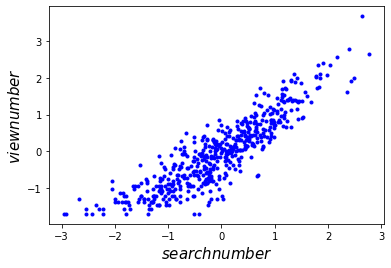

In [88]:
plt.plot(X_plots['search_number'],y_plots, "b.")
plt.xlabel("$search number$", fontsize=15)
plt.ylabel("$view number$", rotation=90, fontsize=15)
#plt.axis([0, 2, 0, 15])
plt.show()


In [ ]:
Linear regression

In [90]:
y_predict = lin_reg.predict(X_test)

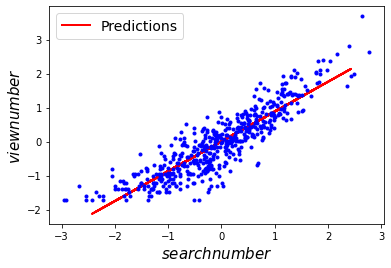

In [91]:
plt.plot(X_test['search_number'], y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X_plots['search_number'],y_plots, "b.")
plt.xlabel("$search number$", fontsize=15)
plt.ylabel("$view number$", rotation=90, fontsize=15)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()